In [1]:
# Read the texts
import json
with open('texts_2', 'r') as f:
    texts = json.loads(f.read())

# Read the labels
import json
with open('labels_2', 'r') as f:
    labels = json.loads(f.read())

# Read the vocab
import json
with open('vocab', 'r') as f:
    vocab = json.loads(f.read())

In [2]:
# Print out the numbers
print("Number of texts: {}".format(len(texts)))
print("Number of labels: {}".format(len(labels)))
print("Number of vocabs: {}".format(len(vocab)))

Number of texts: 2125
Number of labels: 2125
Number of vocabs: 1030


In [35]:
# General tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True,
                        norm="l2",
                        encoding='latin-1',
                        ngram_range=(1, 2),
                        vocabulary=vocab)

In [36]:
from joblib import dump, load
dump(tfidf, 'tfidf_gr.joblib')

['tfidf_gr.joblib']

In [40]:
# Create features out of raw texts
import pandas as pd
X = tfidf.fit_transform(texts)
X = X.toarray()
X = pd.DataFrame(X, columns=tfidf.get_feature_names())

In [213]:
X

,forth non,investment services,estate investment,real estate,rights reserved,forth service,reserved non,notice confidentiality,act id,disclaimer notice,endorsement disclaimer,notice real,services affiliated,offering memorandum,street confidentiality,...,2bdr,replacements,rents average,reserves replacements,overview income,scheduled,forma average,unit apartment,current avg,monthly potential,rental income,complex,prospective,costa,terms use
0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.3011,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
1,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
2,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
3,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
4,0.0,0.050602,0.050163,0.074556,0.053543,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.087529,0.0,0.0,0.097886,0.097886,0.095366,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2120,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.214886,0.0,0.0
2121,0.0,0.082180,0.081467,0.071513,0.086957,0.0,0.000000,0.0,0.144916,0.157156,0.0,0.0,0.0,0.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.112569,0.0,0.0
2122,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.214249,0.0,0.0
2123,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.075593,0.0,0.0


In [3]:
# Create labels y
y = labels

In [6]:
print("X shape: {}".format(X.shape))

X shape: (2125, 1030)


In [41]:
# Initialize random seed
import numpy as np
RANDOM_SEED = 123
np.random.seed(RANDOM_SEED)
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,
                                                    random_state=RANDOM_SEED,shuffle=True,
                                                    stratify=y)

In [4]:
# RF tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_rf = TfidfVectorizer(sublinear_tf=True,
                        norm=None,
                        smooth_idf=True,
                        vocabulary=vocab)

In [34]:
from joblib import dump, load
dump(tfidf_rf, 'tfidf_rf.joblib')

['tfidf_rf.joblib']

In [5]:
# Create features out of raw texts 
import pandas as pd
X_rf = tfidf_rf.fit_transform(texts)
X_rf = X_rf.toarray()
X_rf = pd.DataFrame(X_rf, columns=tfidf_rf.get_feature_names())

In [22]:
# Initialize random seed
import numpy as np
RANDOM_SEED = 123
np.random.seed(RANDOM_SEED)
from sklearn.model_selection import train_test_split

# Split the data
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf,y, test_size=0.2,
                                                    shuffle=True,
                                                    stratify=y)

## Logistic Regression Classifier

In [11]:
from sklearn.linear_model import LogisticRegression
# Instantiate a logistic regression moel
lr = LogisticRegression()

In [12]:
from sklearn.model_selection import RandomizedSearchCV
# Define parameter distribution list
param_dist = {
    "C": [1]
}
# Initialize a random search classifier
lr_cv = RandomizedSearchCV(lr, param_dist, cv=5)

In [13]:
%%time
import warnings; warnings.simplefilter('ignore')

# Fit the model 
lr_cv.fit(X_train,y_train)

CPU times: user 1.12 s, sys: 72.4 ms, total: 1.19 s
Wall time: 703 ms


RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [1]})

In [14]:
# Define best estimator
lr_clf = lr_cv.best_estimator_

In [15]:
# Print best cv results
lr_cv.cv_results_

{'mean_fit_time': array([0.0977006]),
 'std_fit_time': array([0.02685192]),
 'mean_score_time': array([0.01565881]),
 'std_score_time': array([0.00326]),
 'param_C': masked_array(data=[1],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1}],
 'split0_test_score': array([0.99411765]),
 'split1_test_score': array([0.98529412]),
 'split2_test_score': array([0.98823529]),
 'split3_test_score': array([0.98529412]),
 'split4_test_score': array([0.99117647]),
 'mean_test_score': array([0.98882353]),
 'std_test_score': array([0.00342997]),
 'rank_test_score': array([1], dtype=int32)}

In [108]:
# Define predicted labels
y_pred_lr = lr_clf.predict(X_test)
y_pred_lr_train = lr_clf.predict(X_train)

In [17]:
# Print out scores
print('Accuracy on test data: {:.4f}'.format(lr_clf.score(X_test,y_test)))
print('Accuracy on training data: {:.4f}'.format(lr_clf.score(X_train,y_train)))

Accuracy on test data: 0.9882
Accuracy on training data: 0.9918


In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Print out accuracy and cofusion matrix
print(accuracy_score(y_test,y_pred_lr))
print(confusion_matrix(y_test,y_pred_lr))

0.9882352941176471
[[389   0]
 [  5  31]]


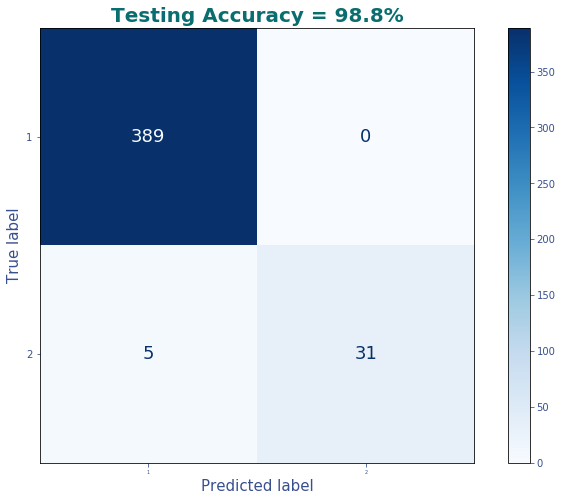

In [116]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from pylab import rcParams

# Plot confusion matrix
rcParams['figure.figsize'] = 12, 8
plot_confusion_matrix(lr_clf, X_test, y_test, cmap = plt.cm.Blues)
plt.rc('ytick', labelsize=10, color='#39508F')
plt.rc('xtick', labelsize=5)
plt.xlabel('Predicted label', color='#39508F', size=15)
plt.ylabel('True label', color='#39508F', size=15)
plt.title('Testing Accuracy = 98.8%', fontsize=20, fontweight='bold', color='#0A6E70')
plt.show()

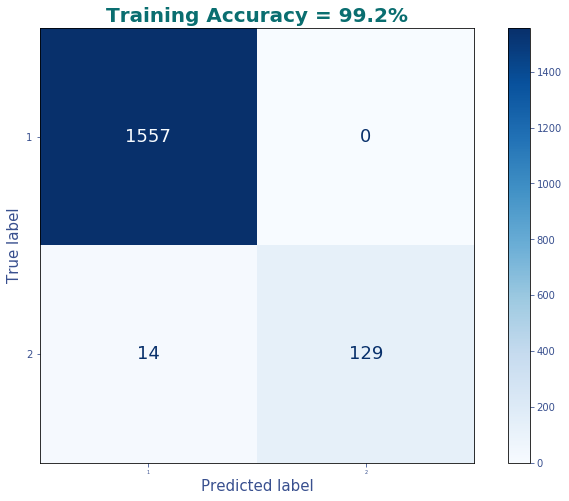

In [117]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from pylab import rcParams



# Plot confusion matrix
rcParams['figure.figsize'] = 12, 8
plot_confusion_matrix(lr_clf, X_train, y_train, cmap = plt.cm.Blues)
plt.rc('ytick', labelsize=10, color='#39508F')
plt.rc('xtick', labelsize=5)
plt.xlabel('Predicted label', color='#39508F', size=15)
plt.ylabel('True label', color='#39508F', size=15)
plt.title('Training Accuracy = 99.2%', fontsize=20, fontweight='bold', color='#0A6E70')
plt.show()

## Support Vector Machine Classifier

In [120]:
from sklearn.svm import SVC

# Instantiate svm
svm = SVC()

In [135]:
from sklearn.model_selection import RandomizedSearchCV

# Define parameter distribution list
param_dist = {
    "C": [1000]
}

# Initialize a random search classifier
svm_cv = RandomizedSearchCV(svm, param_dist, cv=5)

In [136]:
# Fit the model
svm_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=SVC(), param_distributions={'C': [1000]})

In [137]:
# Define best estimator
svm_clf = svm_cv.best_estimator_

In [138]:
# Print out best results
svm_cv.cv_results_

{'mean_fit_time': array([0.57297955]),
 'std_fit_time': array([0.03600422]),
 'mean_score_time': array([0.12747173]),
 'std_score_time': array([0.00921815]),
 'param_C': masked_array(data=[1000],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1000}],
 'split0_test_score': array([0.99411765]),
 'split1_test_score': array([0.99411765]),
 'split2_test_score': array([0.99117647]),
 'split3_test_score': array([0.99411765]),
 'split4_test_score': array([0.99411765]),
 'mean_test_score': array([0.99352941]),
 'std_test_score': array([0.00117647]),
 'rank_test_score': array([1], dtype=int32)}

In [142]:
# Define predicted labels
y_pred_svm = svm_clf.predict(X_test)
y_pred_svm_train = svm_clf.predict(X_train)

In [140]:
# Print out scores
print('Accuracy on test data: {:.4f}'.format(svm_clf.score(X_test,y_test)))
print('Accuracy on training data: {:.4f}'.format(svm_clf.score(X_train,y_train)))

Accuracy on test data: 0.9953
Accuracy on training data: 1.0000


In [144]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Print out accuracy and cofusion matrix -testing data
print(accuracy_score(y_test,y_pred_svm))
print(confusion_matrix(y_test,y_pred_svm))

0.9952941176470588
[[388   1]
 [  1  35]]


In [145]:
# Print out accuracy and cofusion matrix -training data
print(accuracy_score(y_train,y_pred_svm_train))
print(confusion_matrix(y_train,y_pred_svm_train))

1.0
[[1557    0]
 [   0  143]]


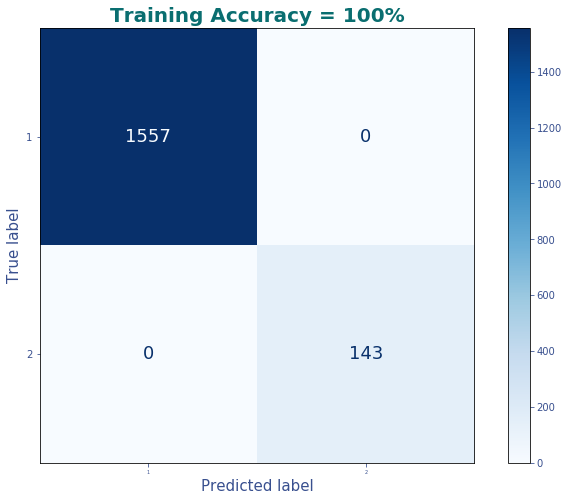

In [177]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from pylab import rcParams

# Plot confusion matrix
rcParams['figure.figsize'] = 12, 8
plot_confusion_matrix(svm_clf, X_train, y_train, cmap = plt.cm.Blues)
plt.rc('ytick', labelsize=10, color='#39508F')
plt.rc('xtick', labelsize=5)
plt.xlabel('Predicted label', color='#39508F', size=15)
plt.ylabel('True label', color='#39508F', size=15)
plt.title('Training Accuracy = 100%', fontsize=20, fontweight='bold', color='#0A6E70')
plt.show()

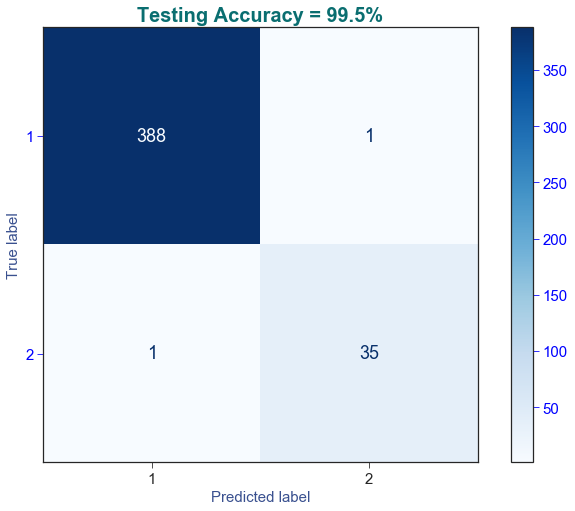

In [214]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from pylab import rcParams

# Plot confusion matrix
rcParams['figure.figsize'] = 12, 8
plot_confusion_matrix(svm_clf, X_test, y_test, cmap = plt.cm.Blues)
plt.rc('ytick', labelsize=10, color='#39508F')
plt.rc('xtick', labelsize=5)
plt.xlabel('Predicted label', color='#39508F', size=15)
plt.ylabel('True label', color='#39508F', size=15)
plt.title('Testing Accuracy = 99.5%', fontsize=20, fontweight='bold', color='#0A6E70')
plt.show()

## Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate a random forest classifier
rf = RandomForestClassifier(verbose=0)

In [24]:
from sklearn.model_selection import RandomizedSearchCV
from random import randint

# Define parameter distribution 
param_dist = {"max_depth": [randint(4, 10)],
              "max_features": [randint(6, 15)],
              "n_estimators": [randint(200, 230)]}

# Initialize a random search classifier
rf_cv = RandomizedSearchCV(rf,
                                   random_state=None,
                                   param_distributions=param_dist,
                                   n_iter=50,
                                   cv=5,
                                   verbose=0)

In [25]:
# Fit the model
rf_cv.fit(X_train_rf,y_train_rf)

/Users/Mohamad/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 1 is smaller than n_iter=50. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': [9], 'max_features': [12],
                                        'n_estimators': [206]})

In [26]:
# Define best estimator
rf_clf = rf_cv.best_estimator_

In [27]:
rf_clf

RandomForestClassifier(max_depth=9, max_features=12, n_estimators=206)

In [33]:
from joblib import dump, load
dump(rf_clf, 'rf_clf.joblib')

['rf_clf.joblib']

In [ ]:
clf = load('rf_clf.joblib') 

In [28]:
# Print out best results
rf_cv.cv_results_

{'mean_fit_time': array([0.91026082]),
 'std_fit_time': array([0.10805604]),
 'mean_score_time': array([0.07349205]),
 'std_score_time': array([0.0201559]),
 'param_n_estimators': masked_array(data=[206],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=[12],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[9],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 206, 'max_features': 12, 'max_depth': 9}],
 'split0_test_score': array([0.99117647]),
 'split1_test_score': array([0.98823529]),
 'split2_test_score': array([0.98823529]),
 'split3_test_score': array([0.98529412]),
 'split4_test_score': array([0.99117647]),
 'mean_test_score': array([0.98882353]),
 'std_test_score': array([0.00220097]),
 'rank_test_score': array([1], dtype=int32)}

In [29]:
# Define predicted labels
y_pred_rf = rf_clf.predict(X_test_rf)
y_pred_rf_train = rf_clf.predict(X_train_rf)

In [30]:
# Print out scores
print('Accuracy on test data: {:.4f}'.format(rf_clf.score(X_test_rf,y_test_rf)))
print('Accuracy on training data: {:.4f}'.format(rf_clf.score(X_train_rf,y_train_rf)))

Accuracy on test data: 0.9929
Accuracy on training data: 0.9965


In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Print out accuracy and cofusion matrix -testing data
print(accuracy_score(y_test_rf,y_pred_rf))
print(confusion_matrix(y_test_rf,y_pred_rf))

0.9929411764705882
[[388   1]
 [  2  34]]


In [32]:
# Print out accuracy and cofusion matrix -training data
print(accuracy_score(y_train_rf,y_pred_rf_train))
print(confusion_matrix(y_train_rf,y_pred_rf_train))

0.9964705882352941
[[1557    0]
 [   6  137]]


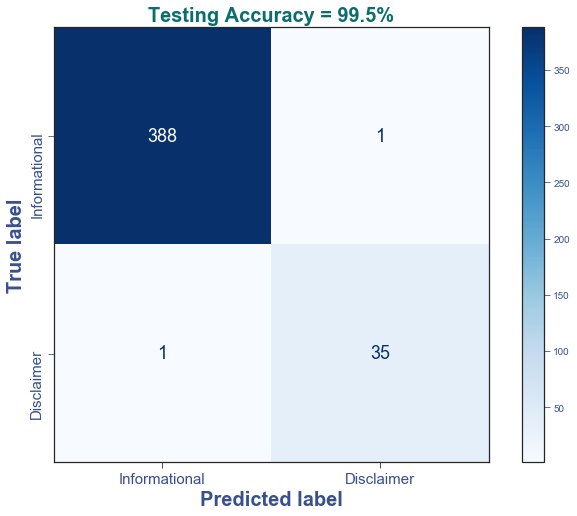

In [257]:
# Plot confusion matrix
rcParams['figure.figsize'] = 12, 8
plot_confusion_matrix(rf_clf, X_test_rf, y_test_rf, cmap = plt.cm.Blues)
plt.rc('ytick', labelsize=10, color='#39508F')
plt.rc('xtick', labelsize=5)
plt.xlabel('Predicted label', color='#39508F', size=20, fontweight='bold')
plt.ylabel('True label', color='#39508F', size=20, fontweight='bold')
plt.xticks(np.arange(2), ["Informational", "Disclaimer"],size=15, color='#39508F' )
plt.yticks(np.arange(2), ["Informational", "Disclaimer"],size=15, rotation=90 )
plt.title('Testing Accuracy = 99.5%', fontsize=20, fontweight='bold', color='#0A6E70')
plt.show()

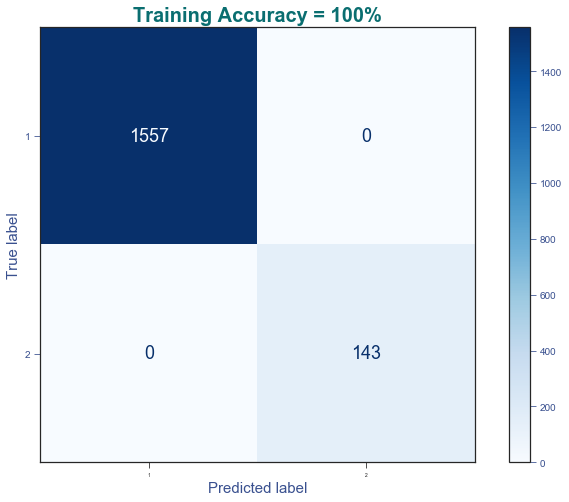

In [237]:
# Plot confusion matrix
rcParams['figure.figsize'] = 12, 8
plot_confusion_matrix(rf_clf, X_train_rf, y_train_rf, cmap = plt.cm.Blues)
plt.rc('ytick', labelsize=10, color='#39508F')
plt.rc('xtick', labelsize=5)
plt.xlabel('Predicted label', color='#39508F', size=15)
plt.ylabel('True label', color='#39508F', size=15)
plt.title('Training Accuracy = 100%', fontsize=20, fontweight='bold', color='#0A6E70')
plt.show()

In [238]:
# Extract feature importances
clf = rf_clf
features = tfidf_rf.get_feature_names()
feature_list = sorted(zip(map(lambda x: round(x, 4),
                      clf.feature_importances_),
                      features),
                      reverse=True)

In [239]:
import numpy as np

# Extract top 20 features
display_features = 20
occ = np.array(list(zip(*feature_list))[0])[:display_features]
feature_names = list(list(zip(*feature_list))[1])[:display_features]

In [240]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
yhat = clf.predict(X_test)
f1 = f1_score(y_test, yhat, average= 'weighted')
accuracy = accuracy_score(y_test, yhat)

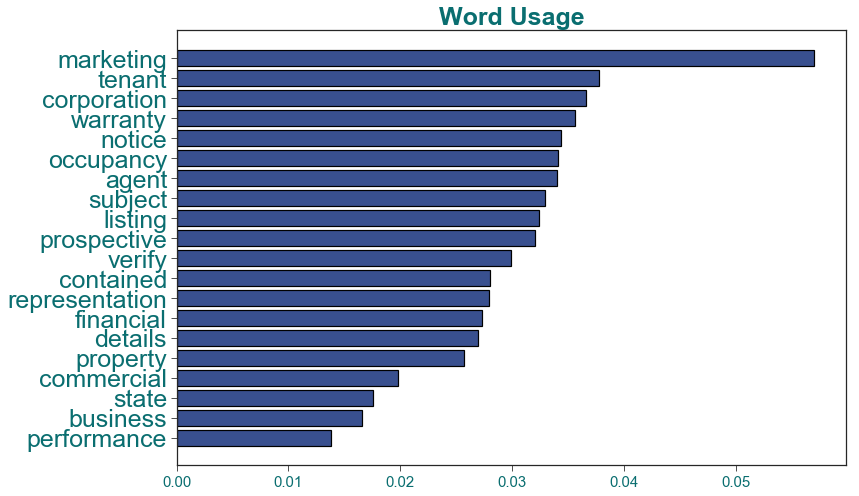

In [259]:
import matplotlib.pyplot as plt
from pylab import rcParams

# Plot feature importances
plt.style.use('seaborn-ticks')
plt.barh(feature_names, occ, orientation = 'horizontal', linewidth=1.2, 
         edgecolor='black', color='#39508F')
plt.title("Word Usage", fontsize=25, fontweight='bold', color="#0A6E70")
plt.rc('ytick', labelsize=20, color='blue')
plt.rc('xtick', labelsize=15)
rcParams['figure.figsize'] = 12, 8
plt.tick_params(labelcolor='#0A6E70')
plt.gca().invert_yaxis()
plt.show()

## Gradient Boosting Classifier

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate sgbt
sgb = GradientBoostingClassifier()

In [38]:
from sklearn.model_selection import RandomizedSearchCV
from random import random

# Define parameter distribution
param_dist = {"max_depth": [randint(4, 6)],
              "max_features": [randint(6, 8)],
              "n_estimators": [randint(200, 225)],
             "subsample": [0.4],
             "max_features": [0.3]}

# Initialize a random search classifier
sgb_cv = RandomizedSearchCV(sgb,
                                   random_state=None,
                                   param_distributions=param_dist,
                                   n_iter=20,
                                   cv=5,
                                   verbose=0)

In [42]:
%%time
# Fit to training set
sgb_cv.fit(X_train, y_train)

/Users/Mohamad/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 1 is smaller than n_iter=20. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


CPU times: user 12.8 s, sys: 133 ms, total: 13 s
Wall time: 13.8 s


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=20,
                   param_distributions={'max_depth': [4], 'max_features': [0.3],
                                        'n_estimators': [222],
                                        'subsample': [0.4]})

In [43]:
# Define best estimator
sgb_clf = sgb_cv.best_estimator_

In [44]:
sgb_clf

GradientBoostingClassifier(max_depth=4, max_features=0.3, n_estimators=222,
                           subsample=0.4)

In [50]:
from joblib import dump, load
dump(sgb_clf, 'sgb_clf.joblib')

['sgb_clf.joblib']

In [45]:
# Print out best results
sgb_cv.cv_results_

{'mean_fit_time': array([2.23478055]),
 'std_fit_time': array([0.3433481]),
 'mean_score_time': array([0.01766658]),
 'std_score_time': array([0.00239983]),
 'param_subsample': masked_array(data=[0.4],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[222],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=[0.3],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[4],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'subsample': 0.4,
   'n_estimators': 222,
   'max_features': 0.3,
   'max_depth': 4}],
 'split0_test_score': array([0.98823529]),
 'split1_test_score': array([0.99117647]),
 'split2_test_score': array([0.99411765]),
 'split3_test_score': array([0.99705882]),
 'split4_test_score': array([0.99411765]),
 'mean_test_score': arra

In [46]:
# Define predicted labels
y_pred_sgb = sgb_clf.predict(X_test)
y_pred_train = sgb_clf.predict(X_train)

In [47]:
# Print out scores
print('Accuracy on test data: {:.4f}'.format(sgb_clf.score(X_test,y_test)))
print('Accuracy on training data: {:.4f}'.format(sgb_clf.score(X_train,y_train)))

Accuracy on test data: 0.9953
Accuracy on training data: 1.0000


In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Print out accuracy and cofusion matrix
print(accuracy_score(y_test,y_pred_sgb))
print(confusion_matrix(y_test,y_pred_sgb))

0.9952941176470588
[[388   1]
 [  1  35]]


In [49]:
# Print out accuracy and cofusion matrix
print(accuracy_score(y_train,y_pred_train))
print(confusion_matrix(y_train,y_pred_train))

1.0
[[1557    0]
 [   0  143]]


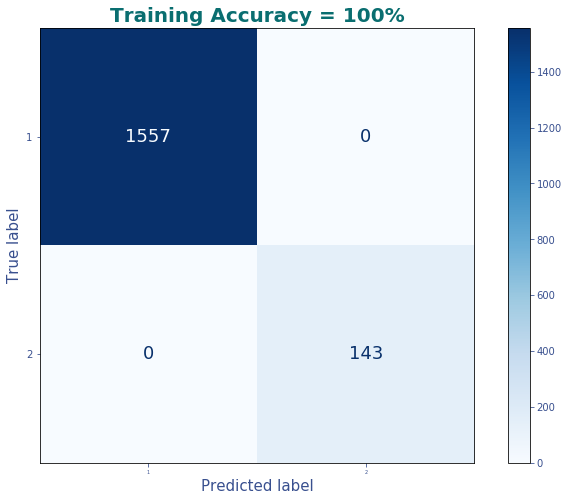

In [186]:
# Plot confusion matrix
rcParams['figure.figsize'] = 12, 8
plot_confusion_matrix(sgb_clf, X_train, y_train, cmap = plt.cm.Blues)
plt.rc('ytick', labelsize=10, color='#39508F')
plt.rc('xtick', labelsize=5)
plt.xlabel('Predicted label', color='#39508F', size=15)
plt.ylabel('True label', color='#39508F', size=15)
plt.title('Training Accuracy = 100%', fontsize=20, fontweight='bold', color='#0A6E70')
plt.show()

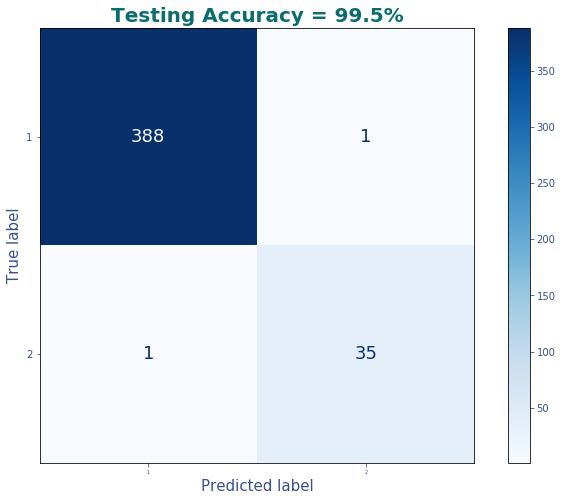

In [187]:
# Plot confusion matrix
rcParams['figure.figsize'] = 12, 8
plot_confusion_matrix(sgb_clf, X_test, y_test, cmap = plt.cm.Blues)
plt.rc('ytick', labelsize=10, color='#39508F')
plt.rc('xtick', labelsize=5)
plt.xlabel('Predicted label', color='#39508F', size=15)
plt.ylabel('True label', color='#39508F', size=15)
plt.title('Testing Accuracy = 99.5%', fontsize=20, fontweight='bold', color='#0A6E70')
plt.show()

## Voting Classifier

In [167]:
from sklearn.ensemble import VotingClassifier
# Instantiate the classifiers
# Already instantiated above ^

# Define a list 'classifiers' that contains a tuple
classifiers = [
    ('Logistic Regression', lr_clf),
    ('Support Vector Machine', svm_clf),
    ('Gradient Boosting', sgb_clf)
]

In [168]:
# Iterate over the defined list of tuples
for clf_name, clf in classifiers:
    
    # Fit clf to training data
    clf.fit(X_train, y_train)
    
    # Predict labels for test set
    y_pred_clfs = clf.predict(X_test)
    
    # Evaluate accuracy on test
    print("{:s} : {:.3f}".format(clf_name, accuracy_score(y_test, y_pred_clfs)))

Logistic Regression : 0.988
Support Vector Machine : 0.995
Gradient Boosting : 0.995


In [169]:
%%time 
# Instantiate a VotingClassifier 'vc'
vc = VotingClassifier(estimators = classifiers)

# Fit the vc to training set and predict labels
vc.fit(X_train, y_train)


CPU times: user 4.29 s, sys: 87 ms, total: 4.38 s
Wall time: 4.6 s


VotingClassifier(estimators=[('Logistic Regression', LogisticRegression(C=1)),
                             ('Support Vector Machine', SVC(C=1000)),
                             ('Gradient Boosting',
                              GradientBoostingClassifier(max_depth=5,
                                                         max_features=0.3,
                                                         n_estimators=212,
                                                         subsample=0.4))])

In [175]:
# Print out predicted labels
y_pred = vc.predict(X_test)
y_pred_vot_pred = vc.predict(X_train)

In [171]:
# Evaluate the test-set accuracy of vc
print("Voting Classifier accuracy: {:.4f}".format(accuracy_score(y_test, y_pred)))

# prinf confusio matrix
print("Confusion Matrix:  ")
print(confusion_matrix(y_test, y_pred))

Voting Classifier accuracy: 0.9953
Confusion Matrix:  
[[388   1]
 [  1  35]]


In [176]:
# Evaluate the test-set accuracy of vc
print("Voting Classifier accuracy: {:.4f}".format(accuracy_score(y_train, y_pred_vot_pred)))

# prinf confusio matrix
print("Confusion Matrix:  ")
print(confusion_matrix(y_train, y_pred_vot_pred))

Voting Classifier accuracy: 1.0000
Confusion Matrix:  
[[1557    0]
 [   0  143]]


In [188]:
#Print out scores
print('Accuracy on test data: {:.4f}'.format(vc.score(X_test,y_test)))
print('Accuracy on training data: {:.4f}'.format(vc.score(X_train,y_train)))

Accuracy on test data: 0.9953
Accuracy on training data: 1.0000


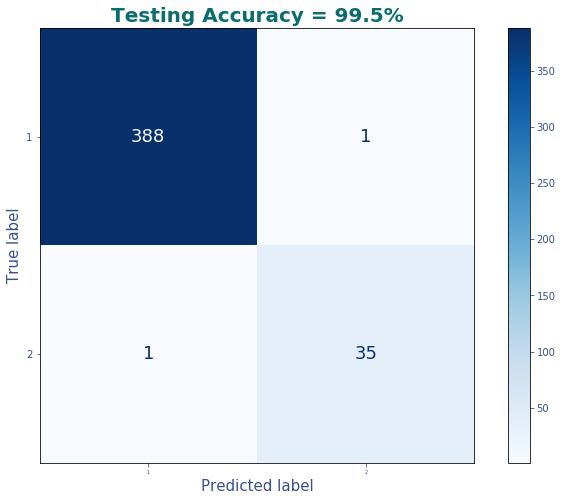

In [189]:
# Plot confusion matrix
rcParams['figure.figsize'] = 12, 8
plot_confusion_matrix(vc, X_test, y_test, cmap = plt.cm.Blues)
plt.rc('ytick', labelsize=10, color='#39508F')
plt.rc('xtick', labelsize=5)
plt.xlabel('Predicted label', color='#39508F', size=15)
plt.ylabel('True label', color='#39508F', size=15)
plt.title('Testing Accuracy = 99.5%', fontsize=20, fontweight='bold', color='#0A6E70')
plt.show()

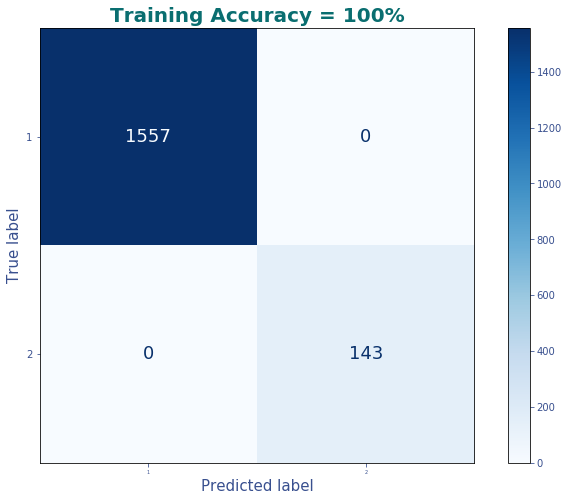

In [190]:
# Plot confusion matrix
rcParams['figure.figsize'] = 12, 8
plot_confusion_matrix(vc, X_train, y_train, cmap = plt.cm.Blues)
plt.rc('ytick', labelsize=10, color='#39508F')
plt.rc('xtick', labelsize=5)
plt.xlabel('Predicted label', color='#39508F', size=15)
plt.ylabel('True label', color='#39508F', size=15)
plt.title('Training Accuracy = 100%', fontsize=20, fontweight='bold', color='#0A6E70')
plt.show()

In [ ]:
plotConfusionMatrix(y_test,y_pred_lr)
rcParams['figure.figsize'] = 12, 8
plt.rc('ytick', labelsize=15, color='#39508F')
plt.rc('xtick', labelsize=15, color='#39508F')
plt.xlabel('Predicted label', color='#39508F', size=15)
plt.ylabel('True label', color='#39508F', size=15)
plt.title('Logistic regression confusion matrix', fontsize=20, fontweight='bold', color='#39508F')
plt.show()



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix
# from sklearn.metrics._classification import *
from sklearn.metrics.classification import _check_targets
from sklearn.utils import check_consistent_length
from sklearn.utils.multiclass import unique_labels
sns.set_palette(sns.hls_palette(8, 0.5, 0.4, 0.4))
font = {"size": 18}
plt.rc('font', **font)
pd.set_option("display.max_column", 30)
def plotConfusionMatrix(y_true, y_pred, classes=None,
                        normalize=False,
                        title=None,
                        cmap=plt.cm.Blues,
                        show=False):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'
    # Compute confusion matrix
    cm, labelDict = custom_confusion_matrix(y_true, y_pred)
    if classes is None:
        classes = [labelDict[i] for i in range(len(labelDict))]
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    fig, ax = plt.subplots(figsize=(12, 8))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=0, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    if show:
        plt.show()
    return ax


def custom_confusion_matrix(y_true, y_pred, labels=None, sample_weight=None,
                     normalize=None):
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
    if y_type not in ("binary", "multiclass"):
        raise ValueError("%s is not supported" % y_type)
    if labels is None:
        labels = unique_labels(y_true, y_pred)
    else:
        labels = np.asarray(labels)
        if np.all([l not in y_true for l in labels]):
            raise ValueError("At least one label specified must be in y_true")
    if sample_weight is None:
        sample_weight = np.ones(y_true.shape[0], dtype=np.int64)
    else:
        sample_weight = np.asarray(sample_weight)
    check_consistent_length(y_true, y_pred, sample_weight)
    n_labels = labels.size
    label_to_ind = {y: x for x, y in enumerate(labels)}
    print(label_to_ind)
    # convert yt, yp into index
    y_pred = np.array([label_to_ind.get(x, n_labels + 1) for x in y_pred])
    y_true = np.array([label_to_ind.get(x, n_labels + 1) for x in y_true])
    # intersect y_pred, y_true with labels, eliminate items not in labels
    ind = np.logical_and(y_pred < n_labels, y_true < n_labels)
    y_pred = y_pred[ind]
    y_true = y_true[ind]
    # also eliminate weights of eliminated items
    sample_weight = sample_weight[ind]
    # Choose the accumulator dtype to always have high precision
    if sample_weight.dtype.kind in {'i', 'u', 'b'}:
        dtype = np.int64
    else:
        dtype = np.float64
    cm = coo_matrix((sample_weight, (y_true, y_pred)),
                    shape=(n_labels, n_labels), dtype=dtype,
                    ).toarray()
    with np.errstate(all='ignore'):
        if normalize == 'true':
            cm = cm / cm.sum(axis=1, keepdims=True)
        elif normalize == 'pred':
            cm = cm / cm.sum(axis=0, keepdims=True)
        elif normalize == 'all':
            cm = cm / cm.sum()
        cm = np.nan_to_num(cm)
    label_dict = {value : key for (key, value) in label_to_ind.items()}
    return cm, label_dict